In [1]:
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf

In [2]:
def read_file(file_path_url):
    """
    .tsv 확장자를 load하기 위한 함수
    """
    return np.loadtxt(file_path_url, delimiter="\t")

root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

train = read_file(root_url + "FordA_TRAIN.tsv")
test = read_file(root_url + "FordA_TEST.tsv")

In [3]:
print(f'train set : {train.shape}')
print(f'test set : {test.shape}')

train set : (3601, 501)
test set : (1320, 501)


In [4]:
train

array([[-1.        , -0.79717168, -0.66439208, ..., -0.66439208,
        -1.0737958 , -1.5643427 ],
       [ 1.        ,  0.80485472,  0.63462859, ..., -0.71488505,
        -0.56044294, -0.31908642],
       [-1.        ,  0.7279851 ,  0.11128392, ...,  0.39446303,
         0.33940042,  0.25539062],
       ...,
       [-1.        , -0.57005428, -0.33316523, ..., -1.3937145 ,
        -0.94273327, -0.27072168],
       [ 1.        ,  2.0067321 ,  2.0791499 , ..., -0.43214504,
        -0.44123126, -0.28070891],
       [-1.        , -0.12524091, -0.32536268, ...,  0.55576053,
         0.57445102,  0.57311598]])

In [5]:
x_train_temp = train[:, 1:]
y_train_temp = train[:,0]
x_test = test[:, 1:]
y_test = test[:, 0]

x_test.shape

(1320, 500)

In [6]:
normal_x = x_train_temp[y_train_temp==1] # 정상 데이터
abnormal_x = x_train_temp[y_train_temp==-1] # 비정상 데이터
normal_y = y_train_temp[y_train_temp==1] # 정상 데이터
abnormal_y = y_train_temp[y_train_temp==-1] # 비정상 데이터

ind_x_normal = int(normal_x.shape[0]*0.8)
ind_y_normal = int(normal_y.shape[0]*0.8)
ind_x_abnormal = int(abnormal_x.shape[0]*0.8)
ind_y_abnormal = int(abnormal_y.shape[0]*0.8)

x_train = np.concatenate((normal_x[:ind_x_normal], abnormal_x[:ind_x_abnormal]), axis=0)
x_valid = np.concatenate((normal_x[ind_x_normal:], abnormal_x[ind_x_abnormal:]), axis=0)
y_train = np.concatenate((normal_y[:ind_y_normal], abnormal_y[:ind_y_abnormal]), axis=0)
y_valid = np.concatenate((normal_y[ind_y_normal:], abnormal_y[ind_y_abnormal:]), axis=0)


In [7]:
print(f'x_train : {x_train.shape}')
print(f'x_valid : {x_valid.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_valid : {y_valid.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (2880, 500)
x_valid : (721, 500)
y_train : (2880,)
y_valid : (721,)
x_test : (1320, 500)
y_test : (1320,)


In [8]:
t= pd.DataFrame(x_train)

In [9]:
y_train = (y_train+1)/2
y_valid = (y_valid+1)/2
y_test = (y_test+1)/2


## 데이터 불균형 (Data Imbalance) 확인

In [10]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes.shape)

x = np.arange(len(classes)) # plot의 x축의 개수 구하기
labels = ["abnormal", "normal"]

values_train = [(y_train == i).sum() for i in classes]
values_valid = [(y_valid == i).sum() for i in classes]
values_test = [(y_test == i).sum() for i in classes]



(2,)


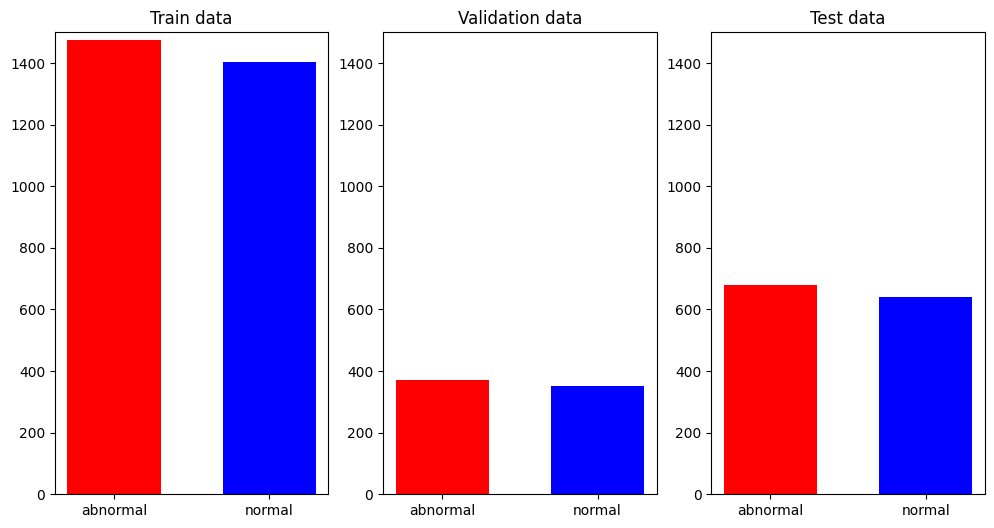

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.title("Train data")
plt.bar(x, values_train, width=0.6, color=["red", "blue"])
plt.ylim([0, 1500])
plt.xticks(x, labels)  # x축에 변수 기입

plt.subplot(132)
plt.title("Validation data")
plt.bar(x, values_valid, width=0.6, color=["red", "blue"])
plt.ylim([0, 1500])
plt.xticks(x, labels)

plt.subplot(133)
plt.title("Test data")
plt.bar(x, values_test, width=0.6, color=["red", "blue"])
plt.ylim([0, 1500])
plt.xticks(x, labels)

plt.show()

## 랜덤한 특정 시간에 정상/비정상 센서값 비교

[0. 1.]


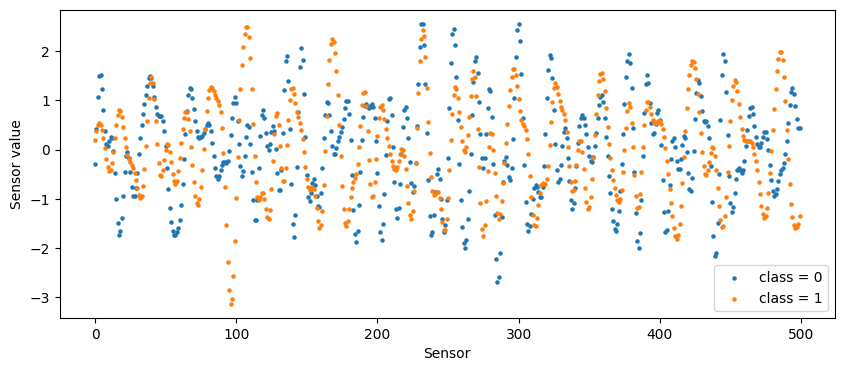

In [12]:
import random

labels = np.unique(np.concatenate((y_train, y_test), axis=0))
print(labels)

plt.figure(figsize = (10, 4))

for c in labels:
    c_x_train = x_train[y_train==c]
    if c == -1: c = c+1  # abnormal class -1 -> 0
    time_t = random.randint(0, c_x_train.shape[0])  # 0~1404 랜덤
    plt.scatter(range(0, 500), c_x_train[time_t], label="class = " + str(int(c)), marker='o', s=5)

plt.legend(loc="lower right")
plt.xlabel("Sensor")
plt.ylabel("Sensor value")
plt.show()

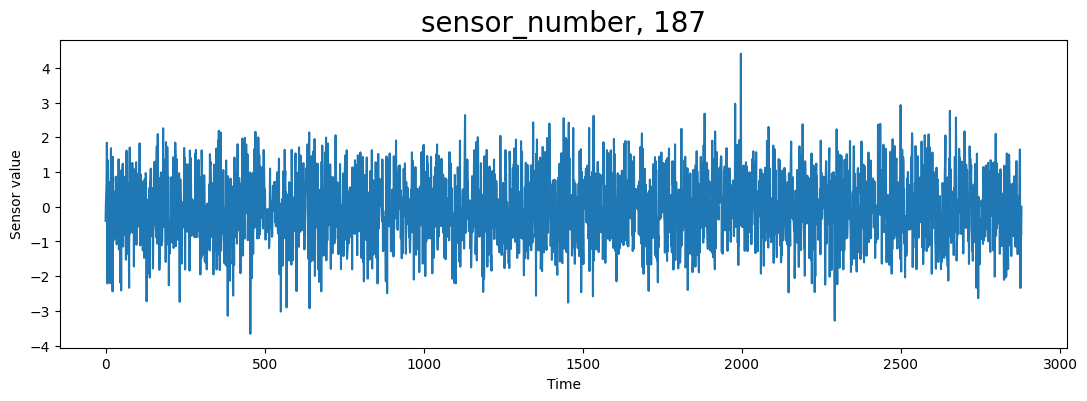

In [13]:
#임의의 센서 값 모든 시간에 대해 플롯
sensor_number = random.randint(0,500)
plt.figure(figsize = (13, 4))
plt.title(f"sensor_number, {sensor_number}", fontsize=20)
plt.plot(x_train[:, sensor_number])
plt.xlabel("Time")
plt.ylabel("Sensor value")
plt.show()

## 센서간 상관관계 분석
* 센서 번호가 가까울 수록 상관성이 높은 점을 확인

C:\Users\whdal\AppData\Local\Temp\ipykernel_17760\1473232682.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', 31)


(500, 500)


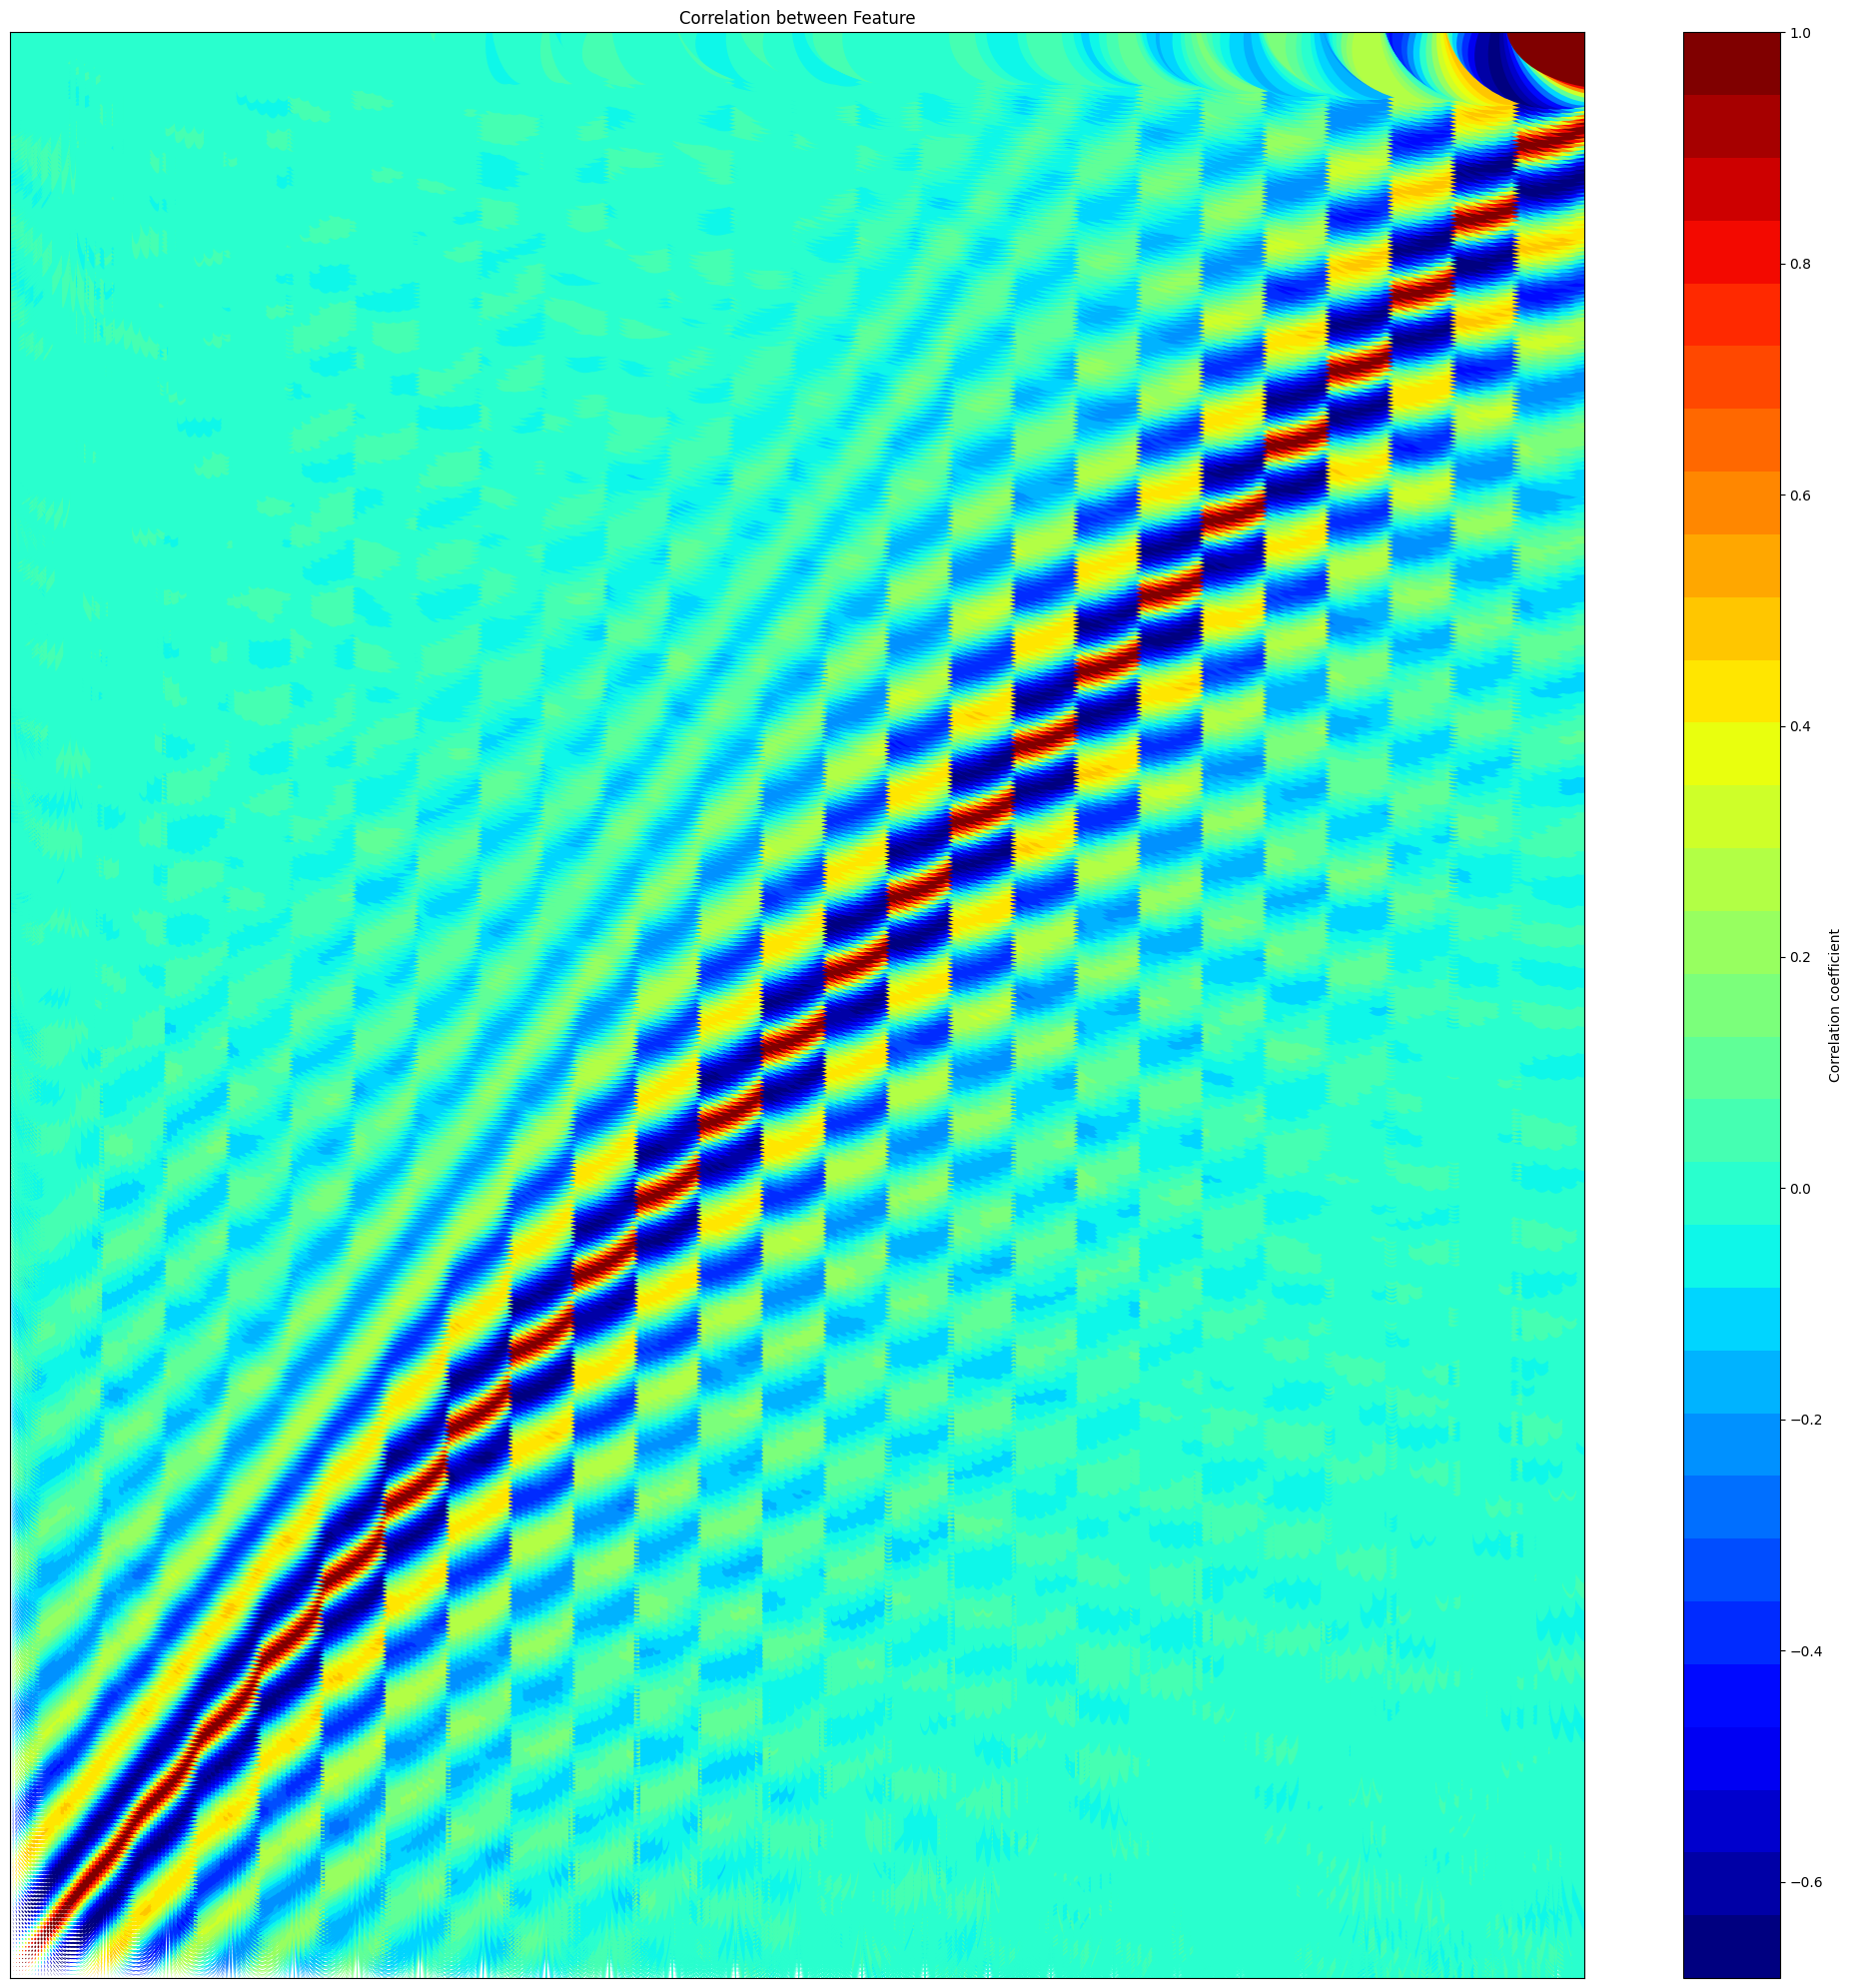

In [14]:
## 상관관계 분석
import matplotlib.cm as cm
from matplotlib.collections import EllipseCollection
np.set_printoptions(threshold=1000, linewidth=1000)

df = pd.DataFrame(data=x_train,
                  columns = ['sensor_{}'.format(label+1) for label in range(x_train.shape[1])])
data = df.corr()
# print(data)

def plot_corr_ellipses(data, ax=None, **kwargs):
    M = np.array(data)
    print(M.shape)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'}) # 단일 서브플랏, x축과 y축의 비율을 동일게
        ax.set_xlim(-0.5, M.shape[1]-0.5)
        ax.set_ylim(-0.5, M.shpae[0]-0.5)

    """
    각 타원의 중심 (각 센서의 corr을 인덱싱하여 x,y 좌표값으로 만들어 주는 과정)
    1. np.indices(M.shape): 각 위치에 대한 인덱스를 생성
    2. [::-1]: 열 인덱스와 행 인덱스의 순서를 뒤집기
    3. reshape(2, -1): 두 개의 행과 적절한 열 수로 배열을 재배치
    4. .T: 배열을 전치하여 각 위치의 (x, y) 좌표 쌍 생성.
    """
    # xy = np.indices(M.shape)[::-1].reshape(2,-1).T  # M.shape=(500,500)
    # # print(xy)

    # w = np.ones_like(M).ravel()
    # h = 1 - np.abs(M).ravel()
    # a = 45*np.sign(M).ravel()
    # # print("=========\n",a)

    """
    비교를 위한 코드
    """
    x = np.arange(M.shape[0])
    y = np.arange(M.shape[1])
    X, Y = np.meshgrid(x, y)

    xy = np.column_stack((X.ravel(), Y.ravel()))

    w = X / 10.0
    h = Y / 15.0
    a = X * 9

    # 타원의 배열에 대한 속성 정의
    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

fig, ax = plt.subplots(1,1, figsize=(20, 20))
cmap = cm.get_cmap('jet', 31)
m = plot_corr_ellipses(data, ax=ax, cmap=cmap)
cb = fig.colorbar(m)
cb.set_label("Correlation coefficient")
plt.title("Correlation between Feature")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()
                                




## 데이터 전처리
1. 데이터 정규화
2. 데이터 형태 변환

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

stdscl = StandardScaler()
stdscl.fit(x_train)
x_train = stdscl.transform(x_train)
x_valid = stdscl.transform(x_valid)

# sbtscl = StandardScaler()  # 이상치에 강건한
# sbtscl.fit(x_train)
# x_train = sbtscl.transform(x_train)
# x_valid = sbtscl.transform(x_valid)

In [17]:
x_train

array([[ 0.76836725,  0.61057968,  0.36402948, ..., -0.70719852, -0.55177596, -0.31140529],
       [-0.50590719, -0.9611438 , -1.24326791, ...,  1.53939226,  0.90041999,  0.20229797],
       [-0.3100555 , -0.95541822, -1.48952808, ...,  1.20972611,  0.85261685,  0.35235299],
       ...,
       [ 0.2135843 ,  0.15793472,  0.08842315, ..., -2.16399088, -2.57035486, -2.81765548],
       [ 0.30729252,  0.25513749,  0.11813824, ..., -0.30203944, -0.02974967,  0.31788236],
       [-0.10995153, -0.12593931, -0.10034609, ..., -1.38190263, -1.04760808, -0.64710691]])

In [18]:
x_train.shape

(2880, 500)

In [16]:
# CNN & RNN 모델의 입력 변수는 3D Tensor
x_train_exp = np.expand_dims(x_train, -1)
x_valid_exp = np.expand_dims(x_valid, -1)
x_test_exp = np.expand_dims(x_test, -1)

print("x_train_exp :", x_train_exp.shape)
print("x_valid_exp :", x_valid_exp.shape)
print("x_test_exp :", x_test_exp.shape)

x_train_exp : (2880, 500, 1)
x_valid_exp : (721, 500, 1)
x_test_exp : (1320, 500, 1)


## 모델링
1. Logistic regression
2. XGBoost classifier
3. RNN
4. CNN

In [17]:
from sklearn.linear_model import LogisticRegression
"""
y=1일 확률(정상일 확률)을 통해 구하는 손실함수 구하여, 경사하강법(SDG)으로 손실함수를 최소화하는 가중치들을 구한다.
그 과정에서 penalty를 이용해 과적합을 방지한다.
https://justweon-dev.tistory.com/15 -> logistic regression
https://velog.io/@hyesoup/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1-%ED%9A%8C%EA%B7%80-Logistic-Regression -> 로그 손실
https://velog.io/@hyesoup/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1-%ED%9A%8C%EA%B7%80-Logistic-Regression -> 경사하강법
https://m.blog.naver.com/je_un/222229440878 -> 시그모이드 함수
https://seongyun-dev.tistory.com/52 -> 최적화
https://wikidocs.net/22881
https://ukb1og.tistory.com/22
"""
# clf_lr1 = LogisticRegression(
#     penalty='l2',                 # 규제 종류 ('l2'는 L2 규제, 'l1'은 L1 규제)
#     tol=0.0001,                   # 수렴 기준을 위한 허용 오차
#     C=1,                          # 규제의 강도, 작은 값일수록 강한 규제
#     fit_intercept=True,           # 절편(intercept)을 모델에 포함할지 여부
#     intercept_scaling=2,          # 절편 스케일링, solver='liblinear'일 때만 사용
#     random_state=2,               # 난수 시드 설정
#     solver='lbfgs',               # 최적화 알고리즘 (이차미분 히세안행렬 사용)
#     max_iter=1000,                # 최대 반복 횟수
#     multi_class='auto',           # 다중 클래스 처리 방법 ('auto'는 자동 선택, 'ovr'은 One-vs-Rest, 'multinomial'은 다중 항목)
#     verbose=0                     # 로그 출력 레벨
# )

clf_lr1 = LogisticRegression(penalty='l2',          # 규제 유형, 기본값은 'l2'
                             C=1,                   # 규제 강도, 기본값은 1
                             random_state=2,
                             max_iter=1000,
                             solver='lbfgs',        # 최적화 알고리즘, 기본값은 'lbfgs'
                             verbose=True)

x_train_lr = np.concatenate((x_train, x_valid), axis=0)
y_train_lr = np.concatenate((y_train, y_valid), axis=0)

clf_lr1.fit(x_train_lr, y_train_lr)
y_pred = clf_lr1.predict(x_test)
score = clf_lr1.score(x_test, y_test)
print(f'Logistic Regression Prediction rate : {score*100}')



Logistic Regression Prediction rate : 48.18181818181818


In [18]:
# !pip install xgboost

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=5,
                    min_child_weight=3,
                    gamma=0.2,
                    subsample=0.6,
                    colsample_bytree=1.0,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)


In [20]:
print(y_train+1)

[2. 2. 2. ... 1. 1. 1.]


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate" : [0.1, 0.01, 0.001, 0.0001],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
    }

grid = GridSearchCV(xgb, 
                    parameters, 
                    n_jobs=4, 
                    scoring="neg_log_loss", 
                    cv=5)

# grid.fit(
#     x_train.squeeze(),
#     y_train,
#     eval_metric="auc",
#     eval_set=[(x_train, y_train), (x_valid, y_valid)],
#     verbose=True
# )

from sklearn.metrics import auc

# grid search 안 하고 싶은면! 
xgb.fit(
    x_train,
    y_train,
    # eval_metric='auc',
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    verbose=True
)


            

[0]	validation_0-logloss:0.67851	validation_1-logloss:0.68670
[1]	validation_0-logloss:0.67016	validation_1-logloss:0.68272
[2]	validation_0-logloss:0.65732	validation_1-logloss:0.68057
[3]	validation_0-logloss:0.64436	validation_1-logloss:0.67743
[4]	validation_0-logloss:0.63720	validation_1-logloss:0.67395
[5]	validation_0-logloss:0.62559	validation_1-logloss:0.67007
[6]	validation_0-logloss:0.61159	validation_1-logloss:0.66419
[7]	validation_0-logloss:0.60207	validation_1-logloss:0.66145
[8]	validation_0-logloss:0.59233	validation_1-logloss:0.65977
[9]	validation_0-logloss:0.58116	validation_1-logloss:0.65468
[10]	validation_0-logloss:0.57501	validation_1-logloss:0.65339
[11]	validation_0-logloss:0.56997	validation_1-logloss:0.65266
[12]	validation_0-logloss:0.56401	validation_1-logloss:0.65110
[13]	validation_0-logloss:0.55438	validation_1-logloss:0.64571
[14]	validation_0-logloss:0.54663	validation_1-logloss:0.64129
[15]	validation_0-logloss:0.54049	validation_1-logloss:0.63774
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [22]:
"""
예시 코드 -> 결과 분석 시 train dataset은 loss가 감소하지만 vallidation dataset에 대한 loss는 오히려 증가하는; 과적합 판단
1. flatten() 사용한 이유 -> https://jiwonkoh.tistory.com/194, Conv2D와 같은 공간적 차원을 가진 레이어에서 1D 벡터로 변환할 때 주로 사용됨
2. 첫번째 layer에 input_shape를 입력해주지 않은 이유
3. 과적합을 확인했지만, dropout을 주지 않은 이유
"""

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

def make_rnn_model():
    model = Sequential()
    model.add(LSTM(units=256, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    return model

rnn = make_rnn_model()
"""
    

'\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Flatten, Dense\n# https://velog.io/@nayeon_p00/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-RNN-%EA%B3%BC-LSTM -> 직관적 이해\n\ndef make_rnn_model():\n    model = Sequential()\n    model.add(LSTM(units=256, return_sequences=True))\n    # model.add(Flatten())\n    model.add(Dense(100, activation=\'relu\'))\n    model.add(Dense(2, activation="softmax"))\n    return model\n\nrnn = make_rnn_model()\n'

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# https://velog.io/@nayeon_p00/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-RNN-%EA%B3%BC-LSTM -> 직관적 이해

def make_rnn_model():
    model = Sequential()
    
    # LSTM 레이어 1
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train_exp.shape[1], x_train_exp.shape[2])))
    model.add(Dropout(0.3))
    
    # LSTM 레이어 2
    model.add(LSTM(units=64, return_sequences=False))  # True인 경우, 마지막 output 결과만 사용하여 성능 떨어질 수 있음 
    model.add(Dropout(0.3))
    
    # Fully Connected Layer
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Output Layer
    model.add(Dense(2, activation='softmax'))
    
    return model

rnn = make_rnn_model()


In [28]:
"""
1. 첫번째 layer에 input_shape를 지정해주지 않아도 되는 이유
"""

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn = make_cnn_model()
"""


'\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense\n\ndef make_cnn_model():\n    model = Sequential()\n    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))\n    model.add(BatchNormalization())\n    model.add(ReLU())\n    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))\n    model.add(BatchNormalization())\n    model.add(ReLU())\n    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))\n    model.add(BatchNormalization())\n    model.add(ReLU())\n    model.add(GlobalAveragePooling1D())\n    model.add(Dense(2, activation="softmax"))\n    return model\n\ncnn = make_cnn_model()\n'

In [37]:
# https://mijeongban.medium.com/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-cnn-convolutional-neural-networks-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-836869f88375

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense, MaxPooling1D

def make_cnn_model():
    model = Sequential()
    
    # 첫 번째 1D 합성곱 레이어
    model.add(Conv1D(filters=64, kernel_size=5, padding="same", input_shape=((x_train_exp.shape[1], x_train_exp.shape[2]))))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(MaxPooling1D(pool_size=2))
    
    # 두 번째 1D 합성곱 레이어
    model.add(Conv1D(filters=128, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(MaxPooling1D(pool_size=2))
    
    # 세 번째 1D 합성곱 레이어
    model.add(Conv1D(filters=256, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    # 글로벌 평균 풀링 레이어
    model.add(GlobalAveragePooling1D())
    
    # Dropout 레이어
    model.add(Dropout(0.5))
    
    # 출력 레이어
    model.add(Dense(2, activation="softmax"))
    
    return model

cnn = make_cnn_model()

## Gridsearch

## 모델 학습
1. RNN
2. CNN

In [30]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path = "C:/Users/whdal/workspace"

epochs=50
batch_size=64
rnn.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["sparse_categorical_accuracy"]
                 )

callbacks = [ModelCheckpoint(save_path + 'rnn_best_model.keras',
                             monitor='val_loss',
                             save_best_only=True),
             ReduceLROnPlateau(
                 monitor="val_loss", factor=0.5, patience=30, min_lr=0.0001
             ),
             EarlyStopping(monitor="val_loss", patience=10, verbose=1)
            ]

history_rnn = rnn.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

# print(x_train_exp.shape)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 0.8496 - sparse_categorical_accuracy: 0.5070 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5090 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.7191 - sparse_categorical_accuracy: 0.5089 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5132 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 0.7047 - sparse_categorical_accuracy: 0.5182 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5132 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.6992 - sparse_categorical_accuracy: 0.5206 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.5049 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.6982 - sparse_categorical_accuracy: 0.5027 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5146 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 0.

In [38]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# epochs=300
epochs=300
batch_size=64
callbacks = [ModelCheckpoint(save_path + 'cnn_best_model.keras',
                             monitor='val_loss',
                             save_best_only=True),
             ReduceLROnPlateau(
                 monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
             ),
             EarlyStopping(monitor="val_loss", patience=50, verbose=1)
            ]

cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

history_cnn = cnn.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

Epoch 1/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.5432 - sparse_categorical_accuracy: 0.7085 - val_loss: 0.7327 - val_sparse_categorical_accuracy: 0.4868 - learning_rate: 0.0010
Epoch 2/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.3092 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.7235 - val_sparse_categorical_accuracy: 0.4868 - learning_rate: 0.0010
Epoch 3/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.2744 - sparse_categorical_accuracy: 0.8792 - val_loss: 0.7561 - val_sparse_categorical_accuracy: 0.4868 - learning_rate: 0.0010
Epoch 4/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.2584 - sparse_categorical_accuracy: 0.8917 - val_loss: 1.2672 - val_sparse_categorical_accuracy: 0.4868 - learning_rate: 0.0010
Epoch 5/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.2775 - sparse_categorical_accuracy: 0.8721 - val_loss: 0.8556 - val_sparse_categorical_accuracy: 0.5021 - learning_rate: 0.0010
Epoch 6/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 99

## 결과 분석
1. confusion matrix
2. ROC curve
3. epoch에 따른 AUC 변화

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

def draw_confusion_matrix(model, xt, yt, model_name):
    Y_pred = model.predict(xt)

    if model_name in ['cnn', 'rnn']:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred

    plt.figure(figsize=(3,3))
    cm = confusion_matrix(yt, y_pred)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['False', 'True'], rotation=45)
    plt.yticks(tick_marks, ['False', 'True'])
    thresh = cm.max()/1.2
    normalize=False

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black",
                 fontsize=12)
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

    print(classification_report(yt, y_pred))
        
    

## ROC Curve

In [40]:
from sklearn.metrics import roc_curve, auc

def draw_roc(model, xt, yt, model_name):
    Y_pred = model.predict(xt)

    if model_name in ['cnn', 'rnn']:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred

    fpr, tpr, thr = roc_curve(yt, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label="ROC curve (area = %0.2f)"% roc_auc)
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver operating characteristic {model_name}")
    plt.legend(loc='lower right')
    # plt.ion()
    plt.tight_layout()
    plt.show()

In [41]:
def plot_loss_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training & Validation Loss')
    plt.ylabel('loss', fontsize='large')
    plt.xlabel('epoch', fontsize='large')
    plt.legend(['train', 'validation'], loc='best')
    plt.tight_layout()
    plt.show()

In [42]:
## Epoch에 따른 정확도(AUC) 그래프

In [43]:
def plot_prediction_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_"+"sparse_categorical_accuracy"])
    plt.title("model "+"Prediction Accuracy")
    plt.ylabel("sparse_categorical_accuracy", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.show()



## 결과 분석 (XGBoost)
1. confusion matrix
2. ROC curve
3. Learning Curve
4. AUC 추이
5. Feature Importance


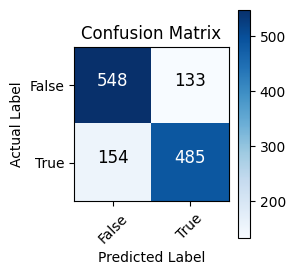

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       681
         1.0       0.78      0.76      0.77       639

    accuracy                           0.78      1320
   macro avg       0.78      0.78      0.78      1320
weighted avg       0.78      0.78      0.78      1320



In [44]:
draw_confusion_matrix(xgb, x_test, y_test, "xgboost")

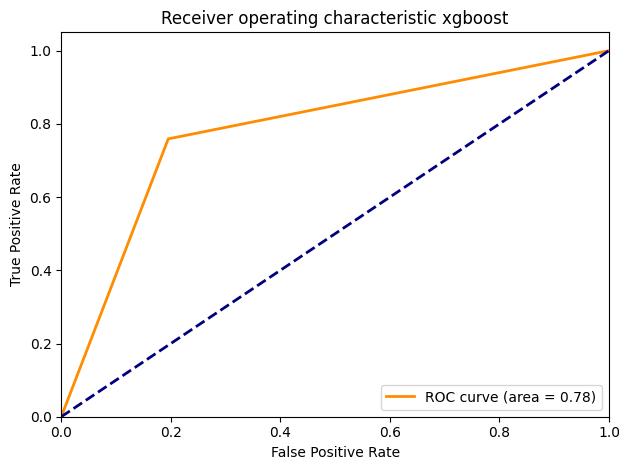

In [45]:
draw_roc(xgb, x_test, y_test, "xgboost")

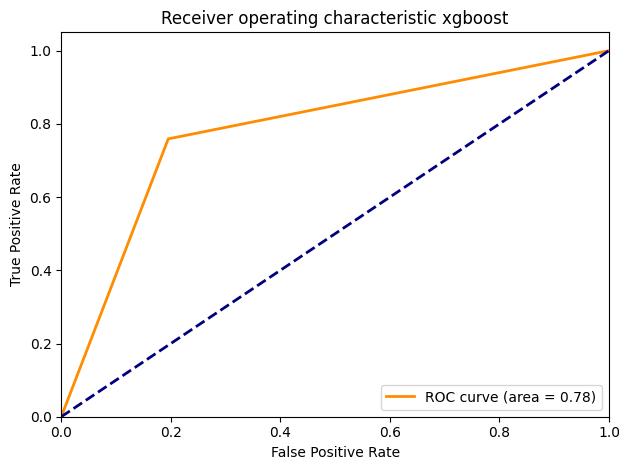

odict_keys(['logloss'])


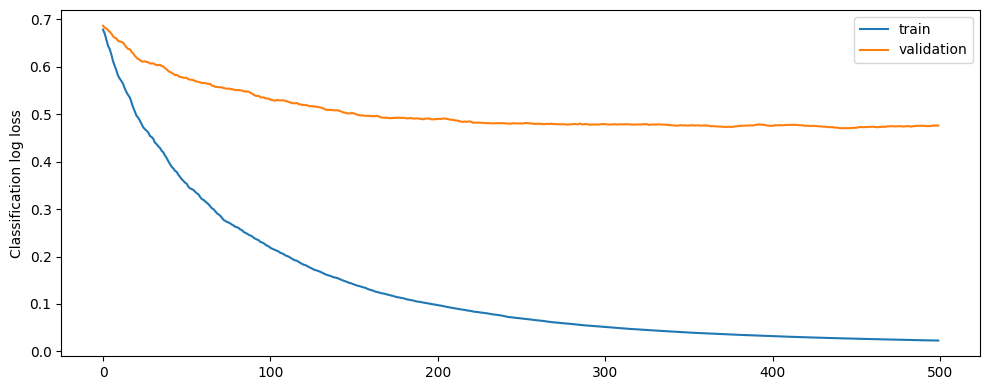

In [46]:
draw_roc(xgb, x_test, y_test, "xgboost")

xgb_result = xgb.evals_result()
print(xgb_result['validation_0'].keys())
epochs = len(xgb_result['validation_0']['logloss'])
x_axis=range(0,epochs)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, xgb_result['validation_0']['logloss'], label='train')
ax.plot(x_axis, xgb_result['validation_1']['logloss'], label='validation')
ax.legend()
plt.ylabel('Classification log loss')
plt.tight_layout()
plt.show()

# print(xgb_result['validation_1'].type)

In [47]:
# fix, ax = plt.subplots(figsize=(10,4))
# ax.plot(x_axis, xgb_result['validation_0']['auc'], label='Train')
# ax.plot(x_axis, xgb_result['validation_1']['auc'], label='Validation')
# ax.legend()
# plt.ylabel('AUC')
# plt.title('XGBoost AUC')
# plt.tight_layout()
# plt.show()


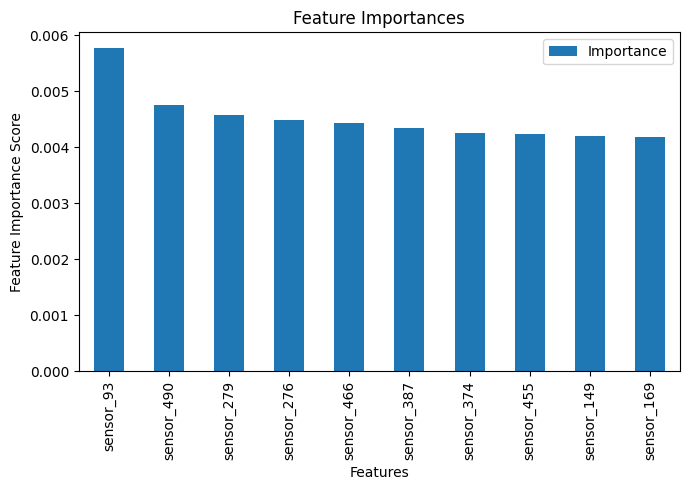

     Features  Importance
0   sensor_93    0.005764
9  sensor_490    0.004753
4  sensor_279    0.004571
3  sensor_276    0.004491
8  sensor_466    0.004438
6  sensor_387    0.004349
5  sensor_374    0.004249
7  sensor_455    0.004236
1  sensor_149    0.004206
2  sensor_169    0.004181
['sensor_93', 'sensor_490', 'sensor_279', 'sensor_276', 'sensor_466', 'sensor_387', 'sensor_374', 'sensor_455', 'sensor_149', 'sensor_169']


In [48]:
# Fearue Importance
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
feat_imp = xgb.feature_importances_
idx = np.where(feat_imp>0.004)
feat_imp_important = feat_imp[idx]
feat = ['sensor_{}'.format(i+1) for i in idx[0]]

res_df = pd.DataFrame(
    {'Features': feat, 'Importance': feat_imp_important}).sort_values(by='Importance', ascending=False)
res_df.plot('Features','Importance', kind='bar', title='Feature Importances', figsize=(7,5))
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()

print(res_df)
print(res_df['Features'].tolist())


## RNN 결과 분석 및 해석

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step


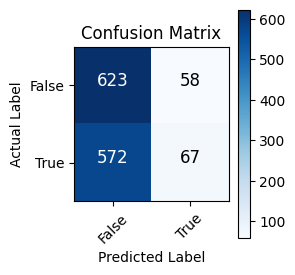

              precision    recall  f1-score   support

         0.0       0.52      0.91      0.66       681
         1.0       0.54      0.10      0.18       639

    accuracy                           0.52      1320
   macro avg       0.53      0.51      0.42      1320
weighted avg       0.53      0.52      0.43      1320



In [49]:
draw_confusion_matrix(rnn, x_test_exp, y_test,"rnn")

42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step


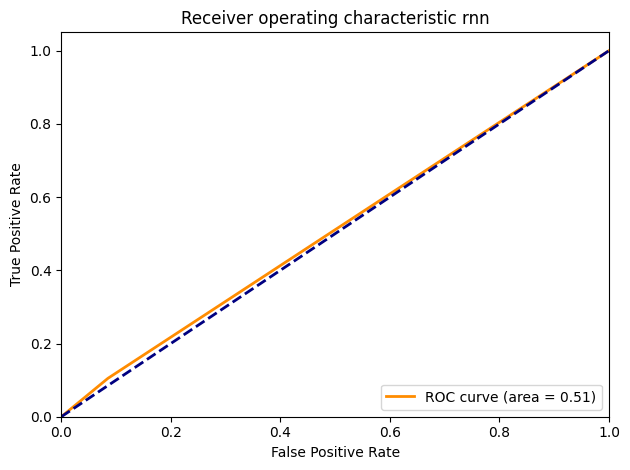

In [50]:
draw_roc(rnn, x_test_exp, y_test,'rnn')

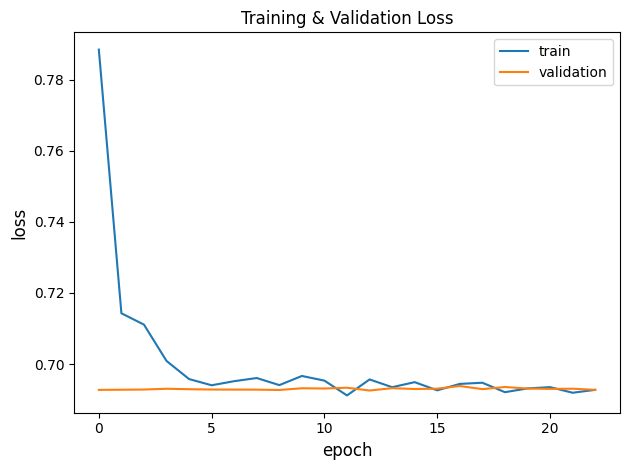

In [51]:
plot_loss_graph(history_rnn, 'rnn')

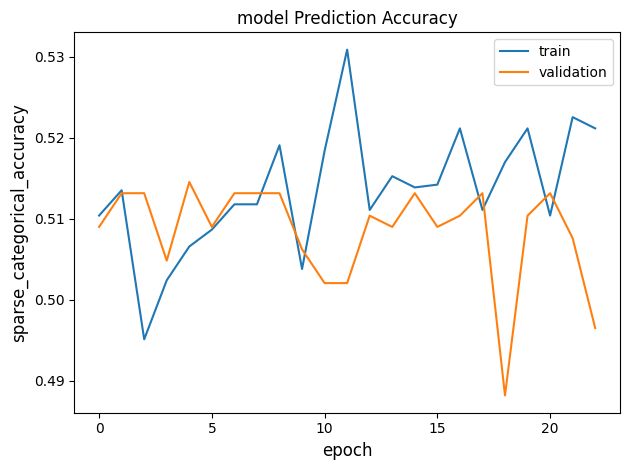

In [52]:
plot_prediction_graph(history_rnn, 'rnn')

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


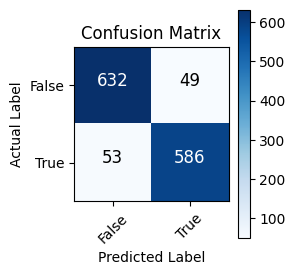

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       681
         1.0       0.92      0.92      0.92       639

    accuracy                           0.92      1320
   macro avg       0.92      0.92      0.92      1320
weighted avg       0.92      0.92      0.92      1320



In [53]:
draw_confusion_matrix(cnn, x_test_exp, y_test,"rnn")

## CNN 결과 분석

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


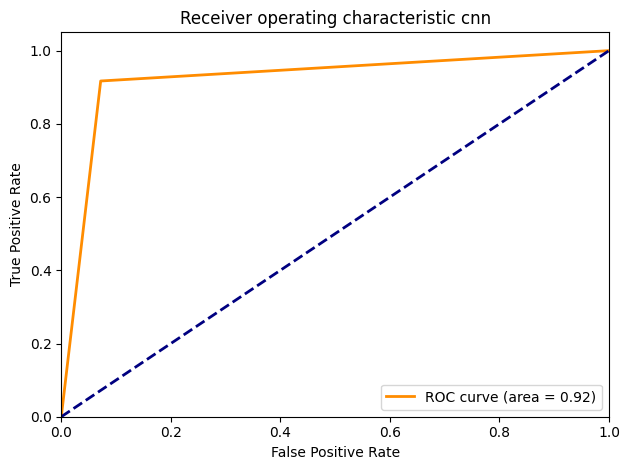

In [54]:
draw_roc(cnn, x_test_exp, y_test,'cnn')

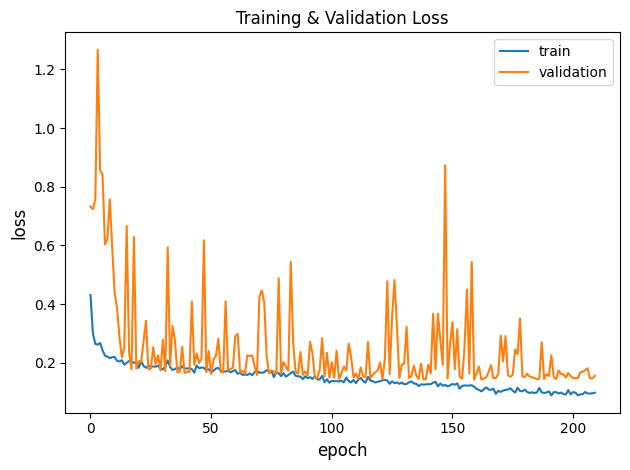

In [55]:
plot_loss_graph(history_cnn, 'cnn')

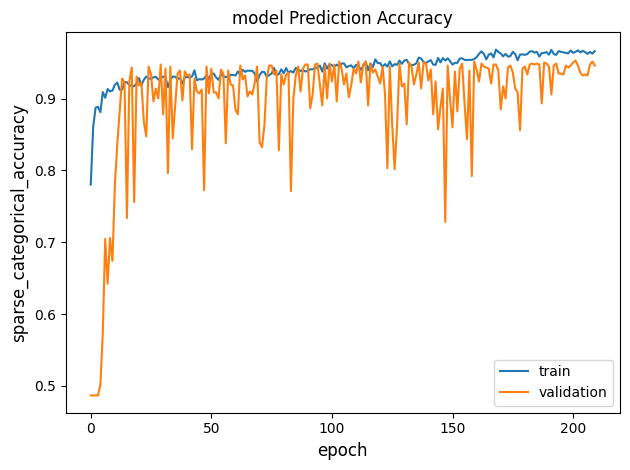

In [56]:
plot_prediction_graph(history_cnn, 'cnn')